In [27]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Mohith Kumar\Desktop\Git Hub Projects\UnSupervised Learning\Smart Loan Recovery System with Machine Learning\loan-recovery.csv")
df.head()

,Borrower_ID,Age,Gender,Employment_Type,Monthly_Income,Num_Dependents,Loan_ID,Loan_Amount,Loan_Tenure,Interest_Rate,...,Collateral_Value,Outstanding_Loan_Amount,Monthly_EMI,Payment_History,Num_Missed_Payments,Days_Past_Due,Recovery_Status,Collection_Attempts,Collection_Method,Legal_Action_Taken
0,BRW_1,59,Male,Salaried,215422,0,LN_1,1445796,60,12.39,...,1.727997e+06,2.914130e+05,4856.88,On-Time,0,0,Partially Recovered,1,Settlement Offer,No
1,BRW_2,49,Female,Salaried,60893,0,LN_2,1044620,12,13.47,...,1.180032e+06,6.652042e+05,55433.68,On-Time,0,0,Fully Recovered,2,Settlement Offer,No
2,BRW_3,35,Male,Salaried,116520,1,LN_3,1923410,72,7.74,...,2.622540e+06,1.031372e+06,14324.61,Delayed,2,124,Fully Recovered,2,Legal Notice,No
3,BRW_4,63,Female,Salaried,140818,2,LN_4,1811663,36,12.23,...,1.145493e+06,2.249739e+05,6249.28,On-Time,1,56,Fully Recovered,2,Calls,No
4,BRW_5,28,Male,Salaried,76272,1,LN_5,88578,48,16.13,...,0.000000e+00,3.918989e+04,816.46,On-Time,1,69,Fully Recovered,0,Debt Collectors,No


In [29]:
df.describe()

,Age,Monthly_Income,Num_Dependents,Loan_Amount,Loan_Tenure,Interest_Rate,Collateral_Value,Outstanding_Loan_Amount,Monthly_EMI,Num_Missed_Payments,Days_Past_Due,Collection_Attempts
count,500.000000,500.000000,500.000000,5.000000e+02,500.00000,500.000000,5.000000e+02,5.000000e+02,500.000000,500.000000,500.000000,500.000000
mean,43.116000,134829.920000,1.476000,1.024907e+06,46.10400,11.192820,6.032240e+05,5.627260e+05,15861.536020,1.912000,70.678000,3.000000
std,12.733217,68969.356746,1.145447,5.907556e+05,18.23706,3.775209,7.457131e+05,4.723581e+05,18709.231315,2.110252,60.211038,2.807805
min,21.000000,15207.000000,0.000000,5.413800e+04,12.00000,5.020000,0.000000e+00,1.571283e+04,261.880000,0.000000,0.000000,0.000000
25%,32.000000,76343.250000,0.000000,4.629848e+05,36.00000,7.907500,0.000000e+00,1.822072e+05,4039.097500,1.000000,4.000000,1.000000
50%,44.000000,134929.500000,1.000000,9.971240e+05,48.00000,10.915000,2.327684e+05,4.133240e+05,9330.170000,2.000000,66.500000,2.000000
75%,53.000000,193086.250000,3.000000,1.557952e+06,60.00000,14.577500,1.111106e+06,8.324787e+05,20439.485000,3.000000,122.250000,4.000000
max,64.000000,249746.000000,3.000000,1.995325e+06,72.00000,17.970000,2.744395e+06,1.932396e+06,127849.230000,12.000000,180.000000,10.000000


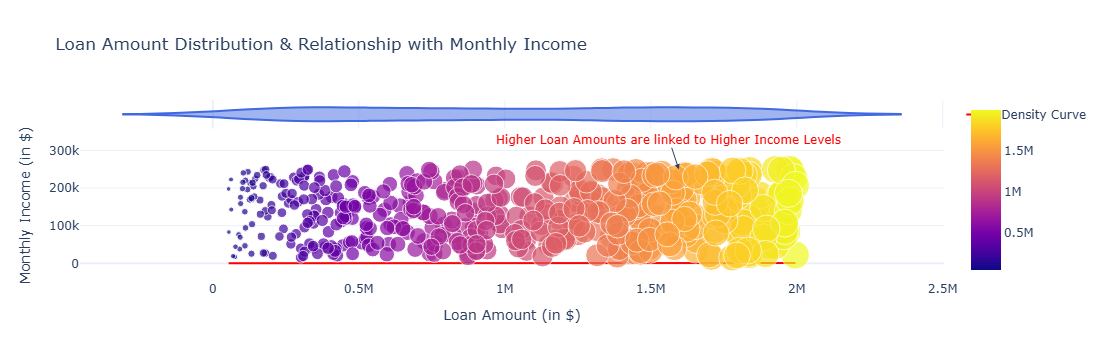

In [50]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd


fig = px.histogram(df, x='Loan_Amount', nbins=30, marginal="violin", opacity=0.7,
                   title="Loan Amount Distribution & Relationship with Monthly Income",
                   labels={'Loan_Amount': "Loan Amount (in $)", 'Monthly_Income': "Monthly Income"},
                   color_discrete_sequence=["royalblue"])

fig.add_trace(go.Scatter(
    x=sorted(df['Loan_Amount']),
    y=px.histogram(df, x='Loan_Amount', nbins=30, histnorm='probability density').data[0]['y'],
    mode='lines',
    name='Density Curve',
    line=dict(color='red', width=2)
))

scatter = px.scatter(df, x='Loan_Amount', y='Monthly_Income',
                     color='Loan_Amount', color_continuous_scale='Viridis',
                     size=df['Loan_Amount'], hover_name=df.index)

for trace in scatter.data:
    fig.add_trace(trace)

fig.update_layout(
    annotations=[
        dict(
            x=max(df['Loan_Amount']) * 0.8, y=max(df['Monthly_Income']),
            text="Higher Loan Amounts are linked to Higher Income Levels",
            showarrow=True,
            arrowhead=2,
            font=dict(size=12, color="red")
        )
    ],
    xaxis_title="Loan Amount (in $)",
    yaxis_title="Monthly Income (in $)",
    template="plotly_white",
    showlegend=True
)

fig.show()

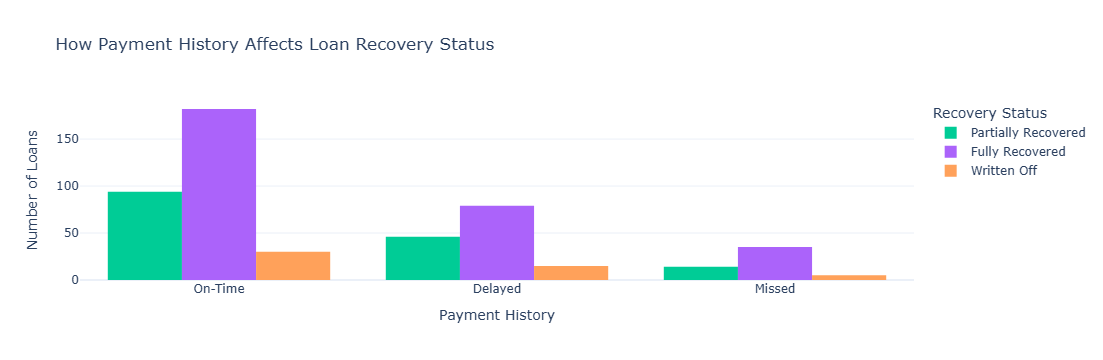

In [52]:
fig = px.histogram(df, x="Payment_History", color="Recovery_Status", barmode="group",
                   title="How Payment History Affects Loan Recovery Status",
                   labels={"Payment_History": "Payment History", "count": "Number of Loans"},
                   color_discrete_map={"Recovered": "green", "Not Recovered": "red"})

fig.update_layout(
    xaxis_title="Payment History",
    yaxis_title="Number of Loans",
    legend_title="Recovery Status",
    template="plotly_white",
        )

fig.show()

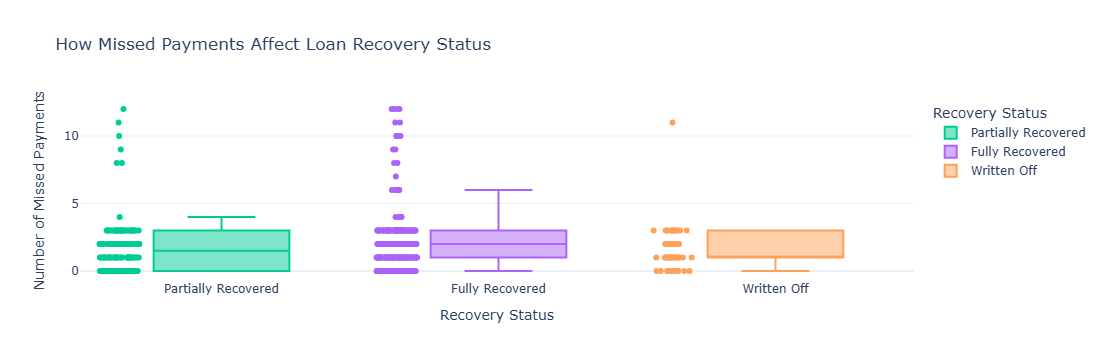

In [54]:
fig = px.box(df, x="Recovery_Status", y="Num_Missed_Payments",
             title="How Missed Payments Affect Loan Recovery Status",
             labels={"Recovery_Status": "Recovery Status", "Num_Missed_Payments": "Number of Missed Payments"},
             color="Recovery_Status",
             color_discrete_map={"Recovered": "green", "Not Recovered": "red"},
             points="all")

fig.update_layout(
    xaxis_title="Recovery Status",
    yaxis_title="Number of Missed Payments",
    template="plotly_white"
)

fig.show()

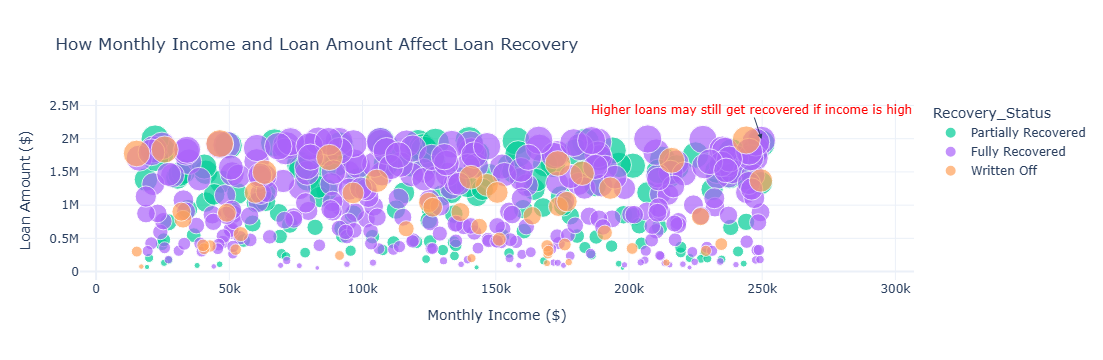

In [56]:
fig = px.scatter(df, x='Monthly_Income', y='Loan_Amount',
                 color='Recovery_Status', size='Loan_Amount',
                 hover_data={'Monthly_Income': True, 'Loan_Amount': True, 'Recovery_Status': True},
                 title="How Monthly Income and Loan Amount Affect Loan Recovery",
                 labels={"Monthly_Income": "Monthly Income ($)", "Loan_Amount": "Loan Amount ($)"},
                 color_discrete_map={"Recovered": "green", "Not Recovered": "red"})

fig.add_annotation(
    x=max(df['Monthly_Income']), y=max(df['Loan_Amount']),
    text="Higher loans may still get recovered if income is high",
    showarrow=True,
    arrowhead=2,
    font=dict(size=12, color="red")
)

fig.update_layout(
    xaxis_title="Monthly Income ($)",
    yaxis_title="Loan Amount ($)",
    template="plotly_white"
)

fig.show()

In [58]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = ['Age', 'Monthly_Income', 'Loan_Amount', 'Loan_Tenure', 'Interest_Rate',
            'Collateral_Value', 'Outstanding_Loan_Amount', 'Monthly_EMI', 'Num_Missed_Payments', 'Days_Past_Due']

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

C:\Users\Mohith Kumar\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



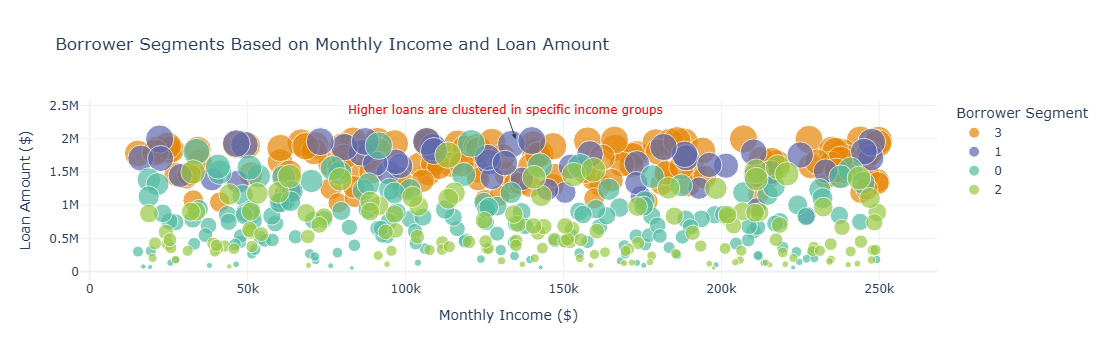

In [60]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Borrower_Segment'] = kmeans.fit_predict(df_scaled)

fig = px.scatter(df, x='Monthly_Income', y='Loan_Amount',
                 color=df['Borrower_Segment'].astype(str), size='Loan_Amount',
                 hover_data={'Monthly_Income': True, 'Loan_Amount': True, 'Borrower_Segment': True},
                 title="Borrower Segments Based on Monthly Income and Loan Amount",
                 labels={"Monthly_Income": "Monthly Income ($)", "Loan_Amount": "Loan Amount ($)", "Borrower_Segment": "Segment"},
                 color_discrete_sequence=px.colors.qualitative.Vivid)

fig.add_annotation(
    x=df['Monthly_Income'].mean(), y=df['Loan_Amount'].max(),
    text="Higher loans are clustered in specific income groups",
    showarrow=True,
    arrowhead=2,
    font=dict(size=12, color="red")
)

fig.update_layout(
    xaxis_title="Monthly Income ($)",
    yaxis_title="Loan Amount ($)",
    template="plotly_white",
    legend_title="Borrower Segment"
)

fig.show()

In [62]:
# updating segment names
df['Segment_Name'] = df['Borrower_Segment'].map({
    0: 'Moderate Income, High Loan Burden',
    1: 'High Income, Low Default Risk',
    2: 'Moderate Income, Medium Risk',
    3: 'High Loan, Higher Default Risk'
})

In [64]:
df.head()

,Borrower_ID,Age,Gender,Employment_Type,Monthly_Income,Num_Dependents,Loan_ID,Loan_Amount,Loan_Tenure,Interest_Rate,...,Payment_History,Num_Missed_Payments,Days_Past_Due,Recovery_Status,Collection_Attempts,Collection_Method,Legal_Action_Taken,Borrower_Segment,Segment_Name,High_Risk_Flag
0,BRW_1,59,Male,Salaried,215422,0,LN_1,1445796,60,12.39,...,On-Time,0,0,Partially Recovered,1,Settlement Offer,No,3,"High Loan, Higher Default Risk",1
1,BRW_2,49,Female,Salaried,60893,0,LN_2,1044620,12,13.47,...,On-Time,0,0,Fully Recovered,2,Settlement Offer,No,1,"High Income, Low Default Risk",0
2,BRW_3,35,Male,Salaried,116520,1,LN_3,1923410,72,7.74,...,Delayed,2,124,Fully Recovered,2,Legal Notice,No,3,"High Loan, Higher Default Risk",1
3,BRW_4,63,Female,Salaried,140818,2,LN_4,1811663,36,12.23,...,On-Time,1,56,Fully Recovered,2,Calls,No,3,"High Loan, Higher Default Risk",1
4,BRW_5,28,Male,Salaried,76272,1,LN_5,88578,48,16.13,...,On-Time,1,69,Fully Recovered,0,Debt Collectors,No,0,"Moderate Income, High Loan Burden",1


In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

df['High_Risk_Flag'] = df['Segment_Name'].apply(lambda x: 1 if x in ['High Loan, Higher Default Risk', 'Moderate Income, High Loan Burden'] else 0)

# selecting features for the model
features = ['Age', 'Monthly_Income', 'Loan_Amount', 'Loan_Tenure', 'Interest_Rate',
            'Collateral_Value', 'Outstanding_Loan_Amount', 'Monthly_EMI', 'Num_Missed_Payments', 'Days_Past_Due']
X = df[features]
y = df['High_Risk_Flag']

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# training the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# get risk scores (probability of being high risk)
risk_scores = rf_model.predict_proba(X_test)[:, 1]  # probability of high risk

# add risk scores and flags to test data
df_test = X_test.copy()
df_test['Risk_Score'] = risk_scores
df_test['Predicted_High_Risk'] = (df_test['Risk_Score'] > 0.5).astype(int)  # Threshold at 50% probability

# merging with borrower details
df_test = df_test.merge(df[['Borrower_ID', 'Segment_Name', 'Recovery_Status', 'Collection_Method', 'Collection_Attempts', 'Legal_Action_Taken']],
                        left_index=True, right_index=True)

In [80]:
# creating a new column for the dynamic recovery strategy based on risk scores
def assign_recovery_strategy(risk_score):
    if risk_score > 0.75:
        return "Immediate legal notices & aggressive recovery attempts"
    elif 0.50 <= risk_score <= 0.75:
        return "Settlement offers & repayment plans"
    else:
        return "Automated reminders & monitoring"

df_test['Recovery_Strategy'] = df_test['Risk_Score'].apply(assign_recovery_strategy)


In [82]:
df_test.columns

Index(['Age', 'Monthly_Income', 'Loan_Amount', 'Loan_Tenure', 'Interest_Rate',
       'Collateral_Value', 'Outstanding_Loan_Amount', 'Monthly_EMI',
       'Num_Missed_Payments', 'Days_Past_Due', 'Risk_Score',
       'Predicted_High_Risk', 'Borrower_ID', 'Segment_Name', 'Recovery_Status',
       'Collection_Method', 'Collection_Attempts', 'Legal_Action_Taken',
       'Recovery_Strategy'],
      dtype='object')

In [84]:
new_df=df_test(columns=['Recovery_Status',
       'Collection_Method', 'Collection_Attempts', 'Legal_Action_Taken',
       'Recovery_Strategy'])

TypeError: 'DataFrame' object is not callable